# Section B: Data Breakdown


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


uploaded = files.upload()
df = pd.read_csv('data.csv')
df.columns = df.columns.str.strip()
df.drop(columns=['Unnamed: 32'], inplace=True)
df.head()

df.drop('id', axis=1, inplace=True)

if df['diagnosis'].dtype == 'object':
    df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})


df.info()
df.describe().T

Saving data.csv to data (2).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


Visual Class Distribution

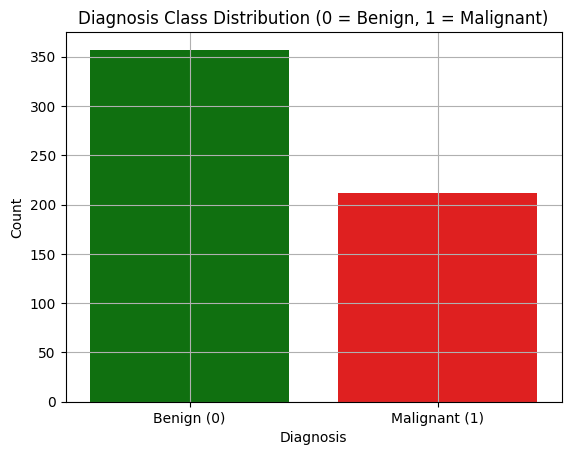

In [46]:
df['diagnosis'] = df['diagnosis'].astype(int)
sns.countplot(data=df, x='diagnosis', hue='diagnosis', palette={0: 'green', 1: 'red'}, legend=False)

plt.title('Diagnosis Class Distribution (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Benign (0)', 'Malignant (1)'])
plt.grid(True)
plt.show()

# Section D: Data Loading and Preprocessing

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


class_distribution = y.value_counts(normalize=True)
benign_pct = class_distribution.get(0, class_distribution.get('0', 0)) * 100
malignant_pct = class_distribution.get(1, class_distribution.get('1', 0)) * 100

print(f"Benign: {benign_pct:.2f}%, Malignant: {malignant_pct:.2f}%")


RANDOM_SEED = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=RANDOM_SEED
)


print("\nTraining set class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))


imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n Data imputed, scaled, and preprocessing completed successfully.")

Benign: 62.74%, Malignant: 37.26%

Training set class distribution:
diagnosis
0    0.626374
1    0.373626
Name: proportion, dtype: float64

Test set class distribution:
diagnosis
0    0.631579
1    0.368421
Name: proportion, dtype: float64

✅ Data imputed, scaled, and preprocessing completed successfully.


# Section E: Data Visualisation

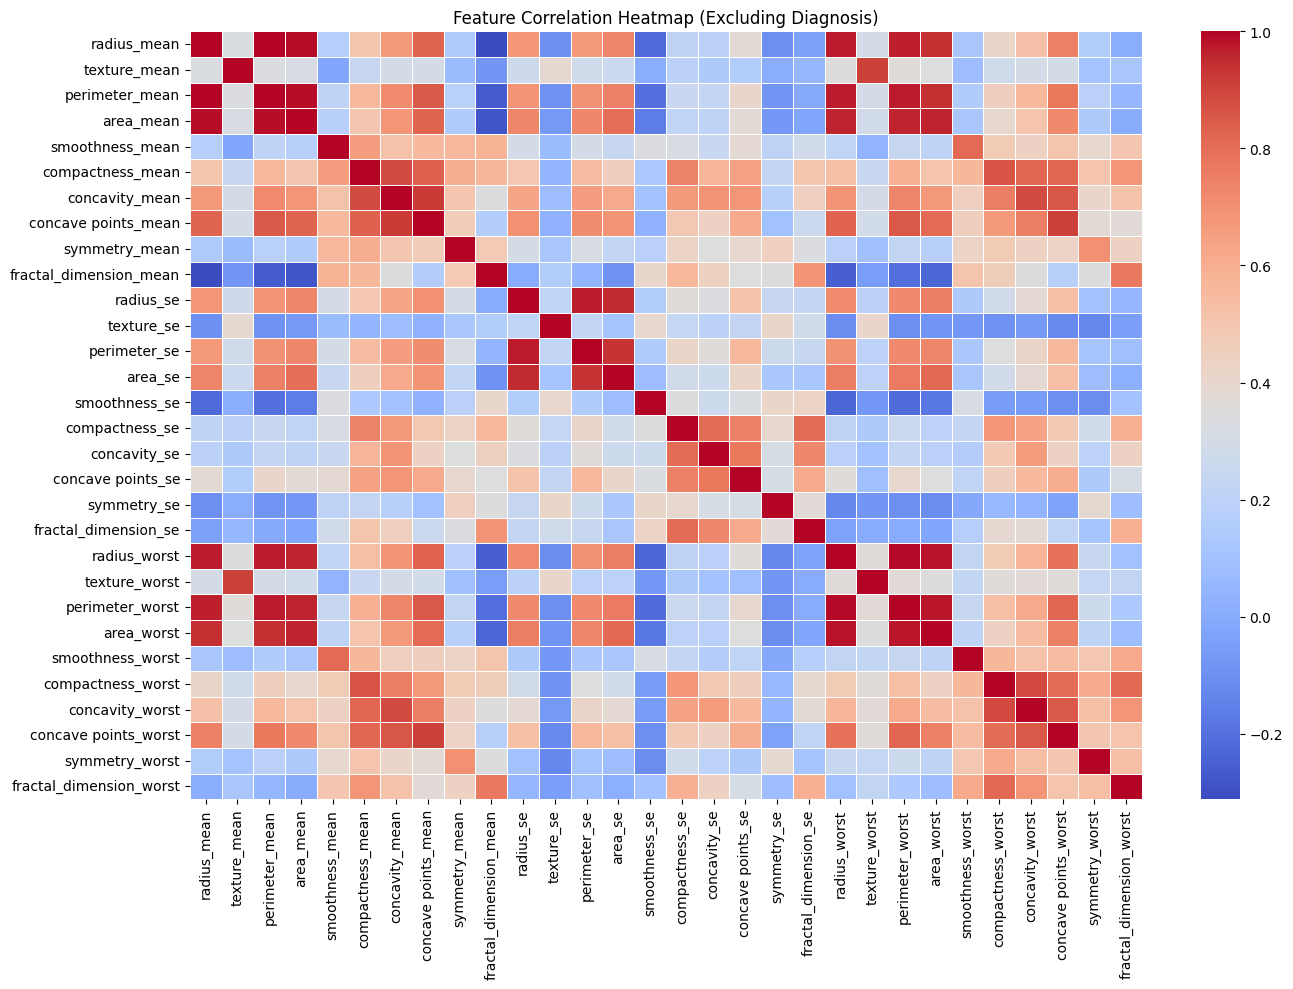

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


plt.figure(figsize=(14, 10))
corr_matrix = df.drop('diagnosis', axis=1).corr()
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap (Excluding Diagnosis)')
plt.tight_layout()
plt.show()

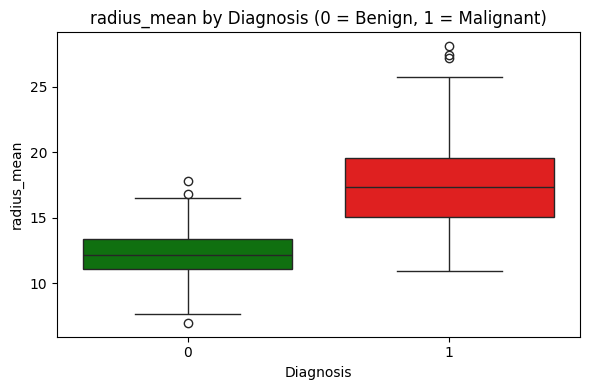

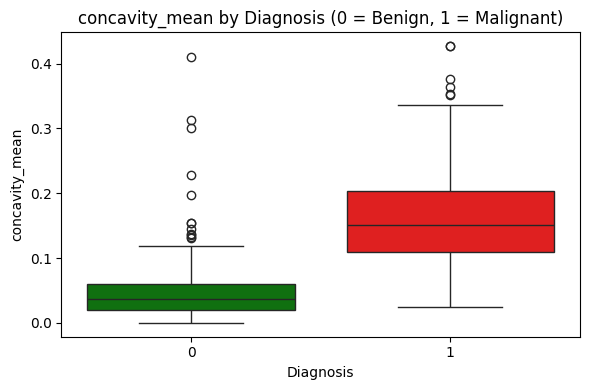

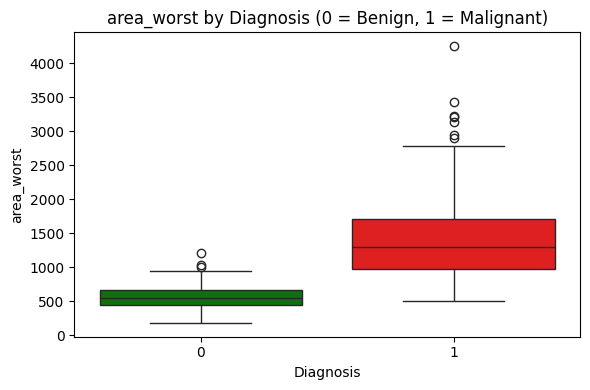

In [49]:
df['diagnosis'] = df['diagnosis'].astype(int)


key_features = ['radius_mean', 'concavity_mean', 'area_worst']

for feature in key_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='diagnosis', y=feature, hue='diagnosis', palette={0: 'green', 1: 'red'}, legend=False)
    plt.title(f'{feature} by Diagnosis (0 = Benign, 1 = Malignant)')
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

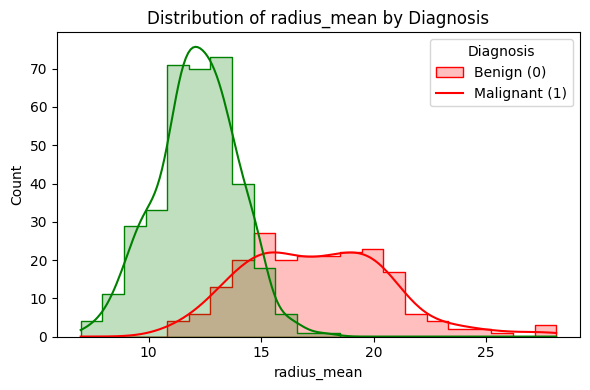

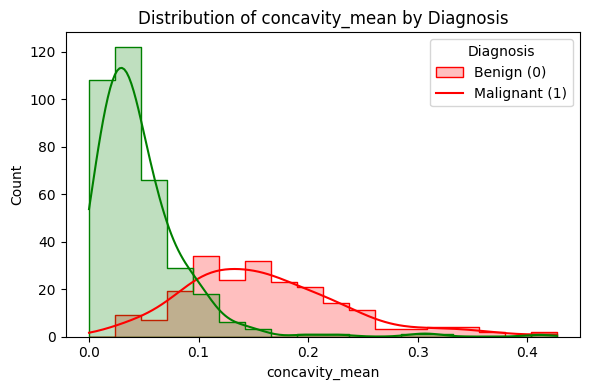

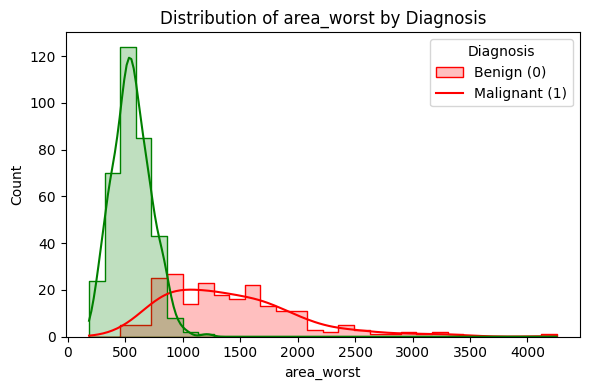

In [50]:
key_features = ['radius_mean', 'concavity_mean', 'area_worst']

for feature in key_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, element='step', palette={0: 'green', 1: 'red'})
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Diagnosis', labels=['Benign (0)', 'Malignant (1)'])
    plt.tight_layout()
    plt.show()

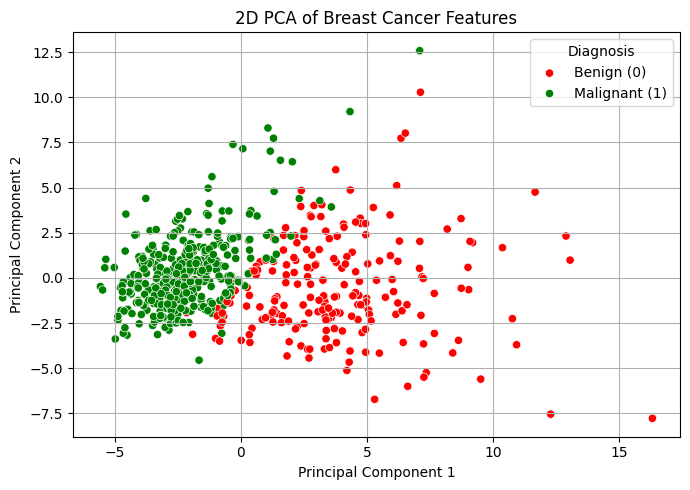

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features_only = df.drop('diagnosis', axis=1)
features_only_clean = features_only.dropna()

if features_only_clean.shape[0] == 0:
    raise ValueError("All rows dropped due to NaNs — consider imputing instead.")


X_scaled = StandardScaler().fit_transform(features_only_clean)
y_clean = df.loc[features_only_clean.index, 'diagnosis'].astype(int)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_clean, palette={0: 'green', 1: 'red'})
plt.title('2D PCA of Breast Cancer Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diagnosis', labels=['Benign (0)', 'Malignant (1)'])
plt.grid(True)
plt.tight_layout()
plt.show()


# Section G: Model Training and Evaluation

Evaluation Summary (Average ± Std over 5 splits):
Accuracy      : 0.9526 ± 0.0232
Precision     : 0.9313 ± 0.0595
Recall        : 0.9482 ± 0.0276
F1            : 0.9381 ± 0.0277
Roc_auc       : 0.9516 ± 0.0192
Balanced_acc  : 0.9516 ± 0.0192

Confusion Matrix (last fold):
[[70  1]
 [ 1 41]]

Classification Report (last fold):
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99        71
   Malignant       0.98      0.98      0.98        42

    accuracy                           0.98       113
   macro avg       0.98      0.98      0.98       113
weighted avg       0.98      0.98      0.98       113



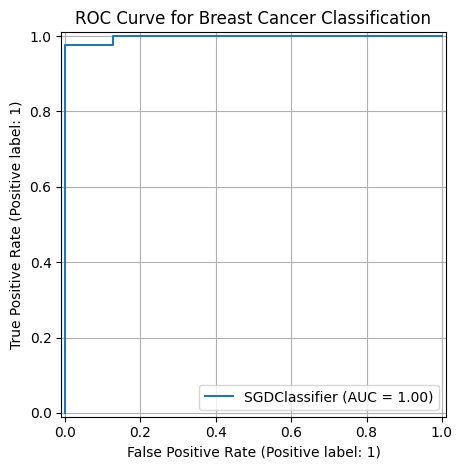

In [54]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay,
    balanced_accuracy_score
)
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df.dropna(axis=1, how='all', inplace=True)
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
df.drop('id', axis=1, inplace=True)

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
metrics = {
    'accuracy': [], 'precision': [], 'recall': [], 'f1': [],
    'roc_auc': [], 'balanced_acc': [],
    'false_positives': [], 'false_negatives': []
}

# Training and evaluation loop
for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
    clf.partial_fit(X_train, y_train, classes=np.array([0, 1]))
    y_pred = clf.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    metrics['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['precision'].append(precision_score(y_test, y_pred))
    metrics['recall'].append(recall_score(y_test, y_pred))
    metrics['f1'].append(f1_score(y_test, y_pred))
    metrics['roc_auc'].append(roc_auc_score(y_test, y_pred))
    metrics['balanced_acc'].append(balanced_accuracy_score(y_test, y_pred))
    metrics['false_positives'].append(fp)
    metrics['false_negatives'].append(fn)


print("Evaluation Summary (Average ± Std over 5 splits):")
for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'balanced_acc']:
    avg = np.mean(metrics[metric])
    std = np.std(metrics[metric])
    print(f"{metric.capitalize():<14}: {avg:.4f} ± {std:.4f}")


print("\nConfusion Matrix (last fold):")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report (last fold):")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))


RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("ROC Curve for Breast Cancer Classification")
plt.grid(True)
plt.tight_layout()
plt.show()


# Section H: Additional ML Task (MRI Dataset)

In [56]:
from google.colab import files
uploaded = files.upload()

Saving archive (7).zip to archive (7) (1).zip


In [57]:
import zipfile
import os

zip_path = 'archive (7).zip'
extract_path = '/content/brain_tumor'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


os.listdir(extract_path)

['Testing', 'Training']

In [58]:
train_dir = '/content/brain_tumor/Training'
test_dir = '/content/brain_tumor/Testing'


print("Train folders:", os.listdir(train_dir))
print("Test folders:", os.listdir(test_dir))

Train folders: ['pituitary', 'notumor', 'meningioma', 'glioma']
Test folders: ['pituitary', 'notumor', 'meningioma', 'glioma']


In [59]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [60]:
# CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


cw = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(cw))


checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    class_weight=class_weights,
    callbacks=[checkpoint]
)

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Predictions and evaluation
test_generator.reset()
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=class_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
 32/179 ━━━━━━━━━━━━━━━━━━━━ 4:43 2s/step - accuracy: 0.3164 - loss: 1.4179